In [19]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

from PIL import Image, ImageDraw

In [20]:
%cd /workspace/CRAFT-pytorch/my-dataset
image_directory = './train/images/'
annotation_file = './train/annotation.json'

coco = COCO(annotation_file)

categories = coco.loadCats(coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

/workspace/CRAFT-pytorch/my-dataset
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Custom COCO categories: 
Null Rect Photo Line Gradient

Custom COCO supercategories: 
shape


In [31]:
a = [1,2,3,4]
a[:2] + [a[0]+a[2]] + [a[1]+a[3]]

[1, 2, 4, 6]

[38.0, 77.0, 95.0, 98.0]
[21.0, 0.0, 106.0, 128.0]
[36.0, 122.0, 74.0, 127.0]
[27.0, 46.0, 96.0, 56.0]


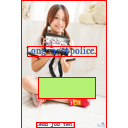

In [32]:
image_ids = coco.getImgIds()
class_ids = coco.getCatIds()

image = coco.loadImgs(image_ids[0])[0]

im = Image.open(image_directory + image['file_name'])
draw = ImageDraw.Draw(im)

for class_id in class_ids:
    annotation_ids = coco.getAnnIds(imgIds=image["id"], catIds=class_id)
#     annotations = coco.loadAnns(annotation_ids)
    for ann in coco.loadAnns(annotation_ids):
#         print(ann)
        b = ann["bbox"]
        print(b[:2] + [b[0]+b[2]] + [b[1]+b[3]])
        draw.rectangle(b[:2] + [b[0]+b[2]] + [b[1]+b[3]], fill=None, outline="red")

#     for annotation in annotations:
#         det = annotation["bbox"] + [category]
#         det[2] += det[0]
#         det[3] += det[1]
#         dets.append(det)

#     category = self._coco2cls[class_id]
#     for annotation in annotations:
#         det = annotation["bbox"] + [category]
#         det[2] += det[0]
#         det[3] += det[1]
#         dets.append(det)

im

[]
{'id': 5, 'file_name': '7.png', 'width': 128, 'height': 128, 'date_captured': '2019-11-09 09:20:14.789229', 'license': 1, 'coco_url': '', 'flickr_url': ''}


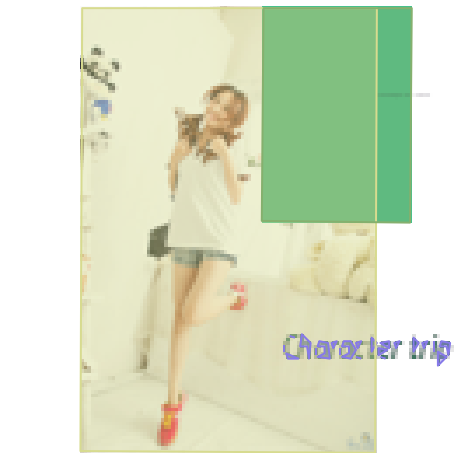

In [7]:
category_ids = example_coco.getCatIds(catNms=['rectangle'])
print(category_ids)
# category_ids = example_coco.getCatIds(catNms=['rectangle'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]
print(image_data)

image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image)
plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)

example_coco